In [66]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from matplotlib.font_manager import FontProperties

In [3]:
df = pd.read_table('diffexpr_data.tsv.gz')

In [4]:
df

,Sample,logFC,pval,pval_corr,log_pval
0,PNLIP,10.092524,6.590327e-01,1.000000e+00,-0.000000
1,CELA2A,8.691414,5.823905e-01,1.000000e+00,-0.000000
2,CLPS,8.054078,6.517331e-01,1.000000e+00,-0.000000
3,MPO,7.817773,4.483336e-01,1.000000e+00,-0.000000
4,AMY2A,7.285231,6.324412e-01,1.000000e+00,-0.000000
...,...,...,...,...,...
20525,SLC12A1,-7.834589,4.993254e-58,1.025115e-53,52.989227
20526,SEMG2,-8.651953,3.989840e-04,1.000000e+00,-0.000000
20527,MUC7,-9.196481,3.281804e-07,6.737544e-03,2.171498
20528,SEMG1,-9.313028,3.880575e-04,1.000000e+00,-0.000000


In [42]:
df['labels'] = 'label'
df['labels'][((df['logFC'] < 0) & (df['pval_corr'] >= 0.05))] = 'Significantly downregulated'
df['labels'][((df['logFC'] > 0) & (df['pval_corr'] >= 0.05))] = 'Significantly upregulated'
df['labels'][((df['logFC'] > 0) & (df['pval_corr'] < 0.05))] = 'Non-significantly upregulated'
df['labels'][((df['logFC'] < 0) & (df['pval_corr'] < 0.05))] = 'Non-significantly downregulated'

/tmp/ipykernel_7731/3443082030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labels'][((df['logFC'] < 0) & (df['pval_corr'] >= 0.05))] = 'Significantly downregulated'
/tmp/ipykernel_7731/3443082030.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labels'][((df['logFC'] > 0) & (df['pval_corr'] >= 0.05))] = 'Significantly upregulated'
/tmp/ipykernel_7731/3443082030.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['

,Sample,logFC,pval,pval_corr,log_pval,labels
0,PNLIP,10.092524,6.590327e-01,1.000000e+00,-0.000000,Significantly upregulated
1,CELA2A,8.691414,5.823905e-01,1.000000e+00,-0.000000,Significantly upregulated
2,CLPS,8.054078,6.517331e-01,1.000000e+00,-0.000000,Significantly upregulated
3,MPO,7.817773,4.483336e-01,1.000000e+00,-0.000000,Significantly upregulated
4,AMY2A,7.285231,6.324412e-01,1.000000e+00,-0.000000,Significantly upregulated
...,...,...,...,...,...,...
20525,SLC12A1,-7.834589,4.993254e-58,1.025115e-53,52.989227,Non-significantly downregulated
20526,SEMG2,-8.651953,3.989840e-04,1.000000e+00,-0.000000,Significantly downregulated
20527,MUC7,-9.196481,3.281804e-07,6.737544e-03,2.171498,Non-significantly downregulated
20528,SEMG1,-9.313028,3.880575e-04,1.000000e+00,-0.000000,Significantly downregulated


,Sample,logFC,pval,pval_corr,log_pval,labels
0,PNLIP,10.092524,0.659033,1.0,-0.0,Significantly upregulated
1,CELA2A,8.691414,0.582390,1.0,-0.0,Significantly upregulated


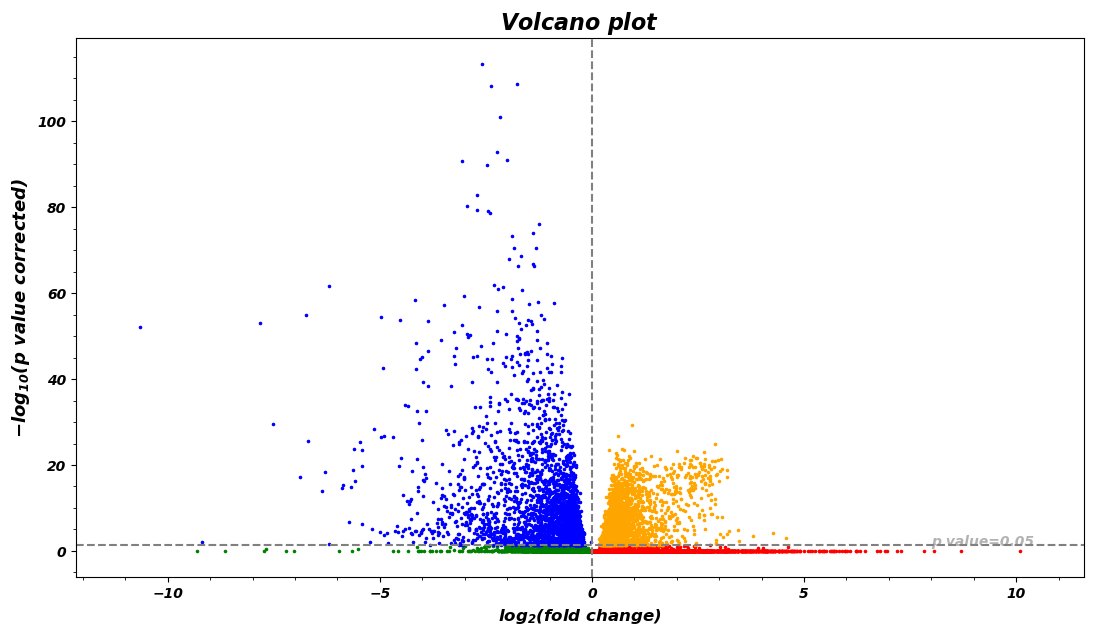

In [99]:
fig, ax = plt.subplots(figsize=(13, 7))

green=df[(df['logFC'] < 0) & (df['pval_corr'] >= 0.05)]
red=df[(df['logFC'] > 0) & (df['pval_corr'] >= 0.05)]
blue=df[(df['logFC'] < 0) & (df['pval_corr'] < 0.05)]
orange=df[(df['logFC'] > 0) & (df['pval_corr'] < 0.05)]




plt.scatter(x=green['logFC'], y=green['log_pval'], s = 2.5, c = 'green')
plt.scatter(x=red['logFC'], y=red['log_pval'], s = 2.5, c = 'red')
plt.scatter(x=blue['logFC'], y=blue['log_pval'], s = 2.5, c = 'blue')
plt.scatter(x=orange['logFC'], y=orange['log_pval'], s = 2.5, c = 'orange')



plt.axvline(x = 0, color='gray', linestyle='--', linewidth=1.5)
plt.axhline(-np.log10(0.05), color='gray', linestyle='--', linewidth=1.5)
plt.text(8, -np.log10(0.06), 'p value=0.05', weight='bold', fontsize=10, c='gray', alpha = 0.6)


plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.bf'] = 'Sans Serif:italic:bold'

plt.xlabel(r"$\mathbf{\bf{log_2(fold \ change)}}$", size=12)
plt.ylabel(r"$\mathbf{\bf{-log_{10}(p \ value \ corrected)}}$", size = 13)
plt.title(r'$\mathbf{\bf{Volcano \ plot}}$', size=16)


plt.minorticks_on()
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.xlim(df.logFC.min() - 1.5, df.logFC.max() + 1.5)
plt.ylim(df.log_pval.min() - 6, df.log_pval.max() + 6)

genes_names = []
